## 4.1数组的归一化标准化算法

### 4.1.1 数据的归一化

### 4.1.2 z-score normalization （标准化）

In [1]:
import numpy as np

In [2]:
def zscore(x, axis = None):
    xmean = x.mean(axis=axis, keepdims=True)
    xstd = np.std(x, axis=axis, keepdims=True)
    zscore = (x-xmean)/xstd
    return zscore

In [3]:
a = np.random.randint(10, size=(2, 5))
a # 生成10个随机数 

array([[2, 5, 0, 6, 1],
       [2, 7, 0, 2, 8]])

In [4]:
zscore(a)

array([[-0.46517657,  0.60830783, -1.18083284,  0.96613596, -0.82300471],
       [-0.46517657,  1.32396409, -1.18083284, -0.46517657,  1.68179223]])

In [5]:
zscore(a, axis=1)

array([[-0.34554737,  0.95025527, -1.2094158 ,  1.38218948, -0.77748158],
       [-0.57616596,  1.02429504, -1.21635036, -0.57616596,  1.34438724]])

In [6]:
b = zscore(a, axis=1)
b

array([[-0.34554737,  0.95025527, -1.2094158 ,  1.38218948, -0.77748158],
       [-0.57616596,  1.02429504, -1.21635036, -0.57616596,  1.34438724]])

In [7]:
b.sum(axis=1)

array([4.4408921e-16, 0.0000000e+00])

In [8]:
b.std(axis=1)

array([1., 1.])

### 4.1.3 min-max normalization

In [9]:
import numpy as np

In [10]:
def min_max(x, axis=None):
    min = x.min(axis=axis, keepdims=True)
    max = x.max(axis=axis, keepdims=True)
    result = (x-min)/(max-min)
    return result

In [11]:
b = np.random.randint(10, size=(2, 5))
b

array([[4, 5, 6, 8, 1],
       [1, 2, 2, 0, 7]])

In [12]:
c = min_max(b)
c

array([[0.5  , 0.625, 0.75 , 1.   , 0.125],
       [0.125, 0.25 , 0.25 , 0.   , 0.875]])

In [13]:
d = min_max(b, axis=1)
d

array([[0.42857143, 0.57142857, 0.71428571, 1.        , 0.        ],
       [0.14285714, 0.28571429, 0.28571429, 0.        , 1.        ]])

### 4.1.4 　向量的归一化

In [14]:
import numpy as np

In [15]:
def normalize(v, axis=-1, order=2):
    l2 = np.linalg.norm(v, ord=order, axis=axis, keepdims=True)
    l2[l2==0] = 1
    return v/l2

In [16]:
a = np.array([1, 2, 3, 2, 1])
a

array([1, 2, 3, 2, 1])

In [17]:
b = normalize(a)
b

array([0.22941573, 0.45883147, 0.6882472 , 0.45883147, 0.22941573])

In [18]:
(b*b).sum()

0.9999999999999997

In [19]:
c = np.random.randint(10, size=(3,4))
c

array([[3, 9, 4, 1],
       [5, 0, 2, 6],
       [5, 4, 9, 3]])

In [20]:
d = normalize(c, axis=None) #对所有的元素进行归一化处理
d

array([[0.19573865, 0.58721594, 0.26098486, 0.06524622],
       [0.32623108, 0.        , 0.13049243, 0.39147729],
       [0.32623108, 0.26098486, 0.58721594, 0.19573865]])

In [21]:
(d*d).sum()

1.289891800546093

In [22]:
e = normalize(c, axis=1)
e

array([[0.29002095, 0.87006284, 0.3866946 , 0.09667365],
       [0.62017367, 0.        , 0.24806947, 0.74420841],
       [0.43685203, 0.34948162, 0.78633365, 0.26211122]])

In [23]:
f = np.random.randint(10, size=(2, 3, 4))

In [24]:
normalize(f, axis=(1, 2))

array([[[0.40289615, 0.26859743, 0.13429872, 0.40289615],
        [0.35812991, 0.13429872, 0.17906495, 0.40289615],
        [0.31336367, 0.        , 0.13429872, 0.40289615]],

       [[0.35744539, 0.53616808, 0.05957423, 0.11914846],
        [0.23829693, 0.11914846, 0.23829693, 0.41701962],
        [0.        , 0.53616808, 0.05957423, 0.47659385]]])

## 4.2 线性回归的NumPy编程

### 4.2.1 何谓线性回归

### 4.2.2 损失函数的设置

### 4.2.3 学习的开展

### 4.2.4 NumPy代码的编写

In [25]:
import numpy as np

In [26]:
X = np.random.rand(20)*8-4 #  –4～4内均匀分布的随机数
X

array([-0.00704153, -3.36389215, -2.88121717, -2.82056316, -3.58473653,
       -2.17113055, -1.07372395,  1.75876087, -1.05798587,  2.77793371,
        2.71603059, -1.62398109,  2.77009393, -3.02587728,  3.42724204,
        3.6139137 , -1.06390556, -0.31049235, -1.56547047, -3.37342048])

In [27]:
y = np.sin(X) + np.random.randn(20)*0.2 # 在正弦曲线的值中加入噪声
y

array([ 0.00988509,  0.01434745, -0.21893683, -0.50653045,  0.39977517,
       -0.74686981, -0.94759835,  0.86797535, -0.80851069,  0.27746659,
        0.41329919, -1.09158087,  0.55381531, -0.04181326, -0.29562844,
       -0.44537379, -0.92324082, -0.35803455, -0.84914074,  0.48470414])

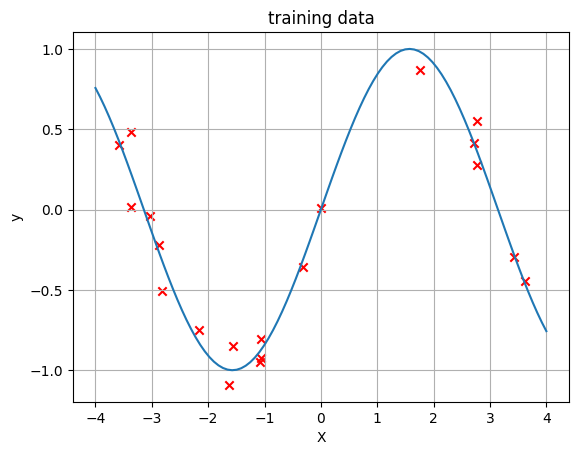

In [28]:
import matplotlib.pyplot as plt
XX = np.linspace(-4, 4, 100) #生成将–4～4内的空间均分为100等分的数列
plt.xlabel('X')
plt.ylabel('y')
plt.title('training data')
plt.grid()
plt.scatter(X, y, marker='x', c='red') # 用marker设置点的形状，c设置颜色，并生成散点图
plt.plot(XX, np.sin(XX)) #  绘制正弦曲线
plt.show()

In [29]:
A = np.empty((6,6)) # 创建保存矩阵A的容器

In [30]:
for i in range(6):
    for j in range(6):
        A[i][j] = np.sum(X**(i+j))

In [31]:
A

array([[ 2.00000000e+01, -1.08594633e+01,  1.24928140e+02,
        -6.29671137e+01,  1.16873040e+03, -5.80899157e+02],
       [-1.08594633e+01,  1.24928140e+02, -6.29671137e+01,
         1.16873040e+03, -5.80899157e+02,  1.22207409e+04],
       [ 1.24928140e+02, -6.29671137e+01,  1.16873040e+03,
        -5.80899157e+02,  1.22207409e+04, -5.85283569e+03],
       [-6.29671137e+01,  1.16873040e+03, -5.80899157e+02,
         1.22207409e+04, -5.85283569e+03,  1.34997694e+05],
       [ 1.16873040e+03, -5.80899157e+02,  1.22207409e+04,
        -5.85283569e+03,  1.34997694e+05, -5.88934971e+04],
       [-5.80899157e+02,  1.22207409e+04, -5.85283569e+03,
         1.34997694e+05, -5.88934971e+04,  1.54466171e+06]])

In [32]:
b = np.empty(6)

In [33]:
for i in range(6):
    b[i] = np.sum(X**i*y)

In [34]:
b

array([  -4.21199032,    9.09058425,   -4.13663477,   -3.17796277,
         10.39733401, -452.46002599])

In [35]:
omega = np.dot(np.linalg.inv(A), b.reshape(-1, 1)) # 使用np.linalg.inv()得到逆矩阵，使用np.dot计算内积

In [36]:
omega.shape

(6, 1)

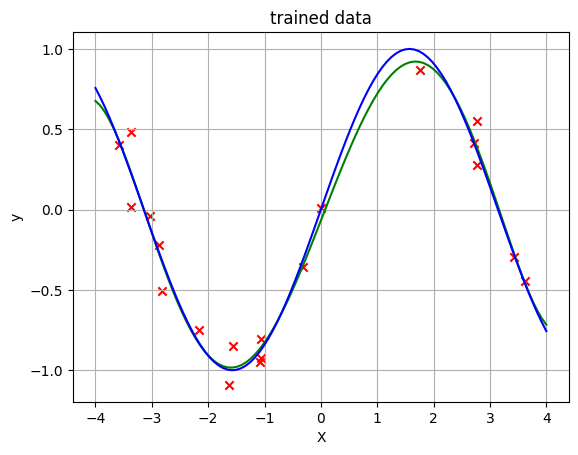

In [37]:
f = np.poly1d(omega.flatten()[::-1]) # 生成将 ω 作为系数的多项式
XX = np.linspace(-4, 4, 100)
plt.xlabel('X')
plt.ylabel('y')
plt.title('trained data')
plt.grid()
plt.scatter(X, y, marker='x', c='red')
plt.plot(XX, f(XX), color='green')
plt.plot(XX, np.sin(XX), color='blue')
plt.show()

### 4.2.5 函数的多项式拟合

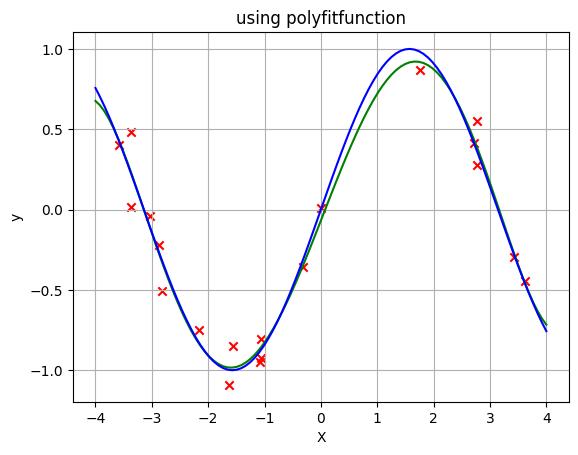

In [38]:
omega_2 = np.polyfit(X, y, 5)
omega_2
f_2 = np.poly1d(omega_2)
f = np.poly1d(omega.flatten()[::-1])
XX = np.linspace(-4, 4, 100)
plt.xlabel('X')
plt.ylabel('y')
plt.title('using polyfitfunction')
plt.grid()
plt.scatter(X, y, marker='x', c='red')
plt.plot(XX, f(XX), color='green')
plt.plot(XX, np.sin(XX), color='blue')
plt.show()

## 4.3 NumPy神经网络编程(基础篇)

### 4.3.1 开始本节的学习之前

### 4.3.2 人类所具有的认知机制

### 4.3.3 对计算机很难,而对人类很简单的问题

### 4.3.4 大脑中的神经网络

### 4.3.5 基于视觉的对象识别

## 4.4 NumPy神经网络编程(基础篇)

### 4.4.1 神经网络

### 4.4.2 神经网络的模拟

### 4.4.3 参数的导入

### 4.4.4 损失函数的设置

### 4.4.5 学习的开展

## 4.5 NumPy 神经网络编程（实践篇）

### 4.5.1 NumPy代码的编写

## 4.5.2 数据集的准备

wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
df = pd.read_csv('iris.data', header=None) #读入之前下载的iris.data文件
print(df) #显示文件的内容
y = df.iloc[0:100,4].values #从数据的内容可以看出，开头的100组数据是Iris setona和Iris virginica的部分，将其中的标签数据单独提取出来
y = np.where(y=='Iris-setona', -1, 1) ##从数据的内容可以看出，开头的100组数据是Iris setona和Iris virginica的部分，将其中的标签数据单独提取出来
X = df.iloc[0:100,[0, 1, 2, 3]].values #  1~4号数据是在学习中需要使用的，因此将其提取出来

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


### 4.5.3　训练数据和测试数据的划分

In [40]:
X_train = np.empty((80, 4)) # 创建用于存放数据的空数组
X_test = np.empty((20, 4))
y_train = np.empty(80)
y_test = np.empty(20)
X_train[:40],X_train[40:] = X[:40],X[50:90]
X_test[:10],X_test[10:] = X[40:50],X[90:100]
y_train[:40],y_train[40:] = y[:40],y[50:90]
y_test[:10],y_test[10:] = y[40:50],y[90:100]

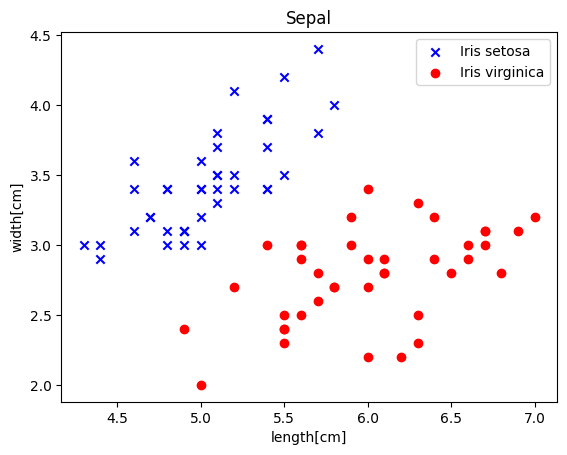

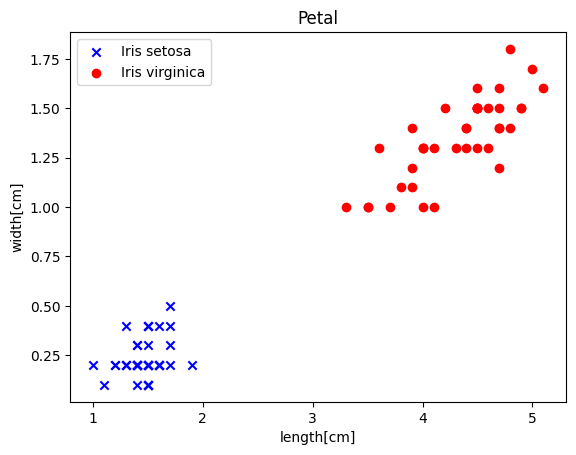

In [41]:
plt.title('Sepal') # 萼片
plt.xlabel('length[cm]')
plt.ylabel('width[cm]')
plt.scatter(X_train[:40, 0], X_train[:40, 1],marker='x', color='blue', label='Iris setosa')
plt.scatter(X_train[40:, 0], X_train[40:, 1],marker='o', color='red', label='Iris virginica')
plt.legend()
plt.show()

# 接下来是花瓣
plt.title('Petal') #花瓣
plt.xlabel('length[cm]')
plt.ylabel('width[cm]')
plt.scatter(X_train[:40,2], X_train[:40, 3],marker='x', color='blue', label='Iris setosa')
plt.scatter(X_train[40:, 2], X_train[40:, 3],marker='o', color='red', label='Iris virginica')
plt.legend()
plt.show()

### 4.5.4　神经网络的构建

In [42]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def activation(X, w, b):
    return sigmoid(np.dot(X, w)+b)

def loss(X, y, w, b):
    dif = y - activation(X, w, b)
    return np.sum(dif**2/(2*len(y)),keepdims=True)

def accuracy(X, y, w, b):
    pre = predict(X, w, b)
    return np.sum(np.where(pre==y, 1, 0))/len(y)

def predict(X, w, b):
    result = np.where(activation(X, w, b)<0.5, -1.0, 1.0)
    return result

def update(X, y, w, b, eta): # 对权重进行更新，其中eta为学习率
    a = (activation(X, w, b)-y)*activation(X, w, b)*(1-activation(X, w, b))
    a = a.reshape(-1, 1)
    w -= eta * 1/float(len(y))*np.sum(a*X, axis=0)
    b -= eta * 1/float(len(y))*np.sum(a)
    return w, b

def update_2(X, y, w, b, eta): # 将w和b的值分别稍微调大时，用偏微分计算输出值的变化情况
    h = 1e-4
    loss_origin = loss(X, y, w, b)
    delta_w = np.zeros_like(w)
    delta_b = np.zeros_like(b)
    for i in range(4):
        tmp = w[i]
        w[i] += h # 将参数中的一个值稍微调大一点
        loss_after = loss(X, y, w, b)
        delta_w[i] = eta*(loss_after - loss_origin)/h
        w[i] = tmp
    tmp = b
    b += h
    loss_after = loss(X, y, w, b)
    delta_b = eta*(loss_after - loss_origin)/h
    w -= delta_w #  更新参数值
    b = tmp - delta_b
    return w, b

In [43]:
weights_1 = np.ones(4)/10 # w的初始值全部设为0.1
bias_1 = np.ones(1)/10 #b的初始值也设为0.1
weights_2 = np.ones(4)/10
bias_2 = np.ones(1)/10
for _ in range(15): # 先让模型进行15次学习
    weights_1, bias_1 = update(X_train, y_train, weights_1, bias_1, eta=0.1)
    weights_2, bias_2 = update(X_train , y_train, weights_2, bias_2, eta=0.1)
    print('acc_1 %f, loss_1 %f, acc_2 %f, loss_2 %f' % ( accuracy(X_test, y_test, weights_1, bias_1), \
    loss(X_test, y_test, weights_1, bias_1)\
    ,accuracy(X_test, y_test, weights_2, bias_2), loss(X_test, y_test, weights_2, bias_2)))
print('weights_1 = ', weights_1, 'bias_1 = ', bias_1)
print('weights_2 = ', weights_2, 'bias_2 = ', bias_2)

acc_1 1.000000, loss_1 0.019286, acc_2 1.000000, loss_2 0.019286
acc_1 1.000000, loss_1 0.015770, acc_2 1.000000, loss_2 0.015770
acc_1 1.000000, loss_1 0.013320, acc_2 1.000000, loss_2 0.013320
acc_1 1.000000, loss_1 0.011520, acc_2 1.000000, loss_2 0.011520
acc_1 1.000000, loss_1 0.010142, acc_2 1.000000, loss_2 0.010142
acc_1 1.000000, loss_1 0.009056, acc_2 1.000000, loss_2 0.009056
acc_1 1.000000, loss_1 0.008177, acc_2 1.000000, loss_2 0.008177
acc_1 1.000000, loss_1 0.007452, acc_2 1.000000, loss_2 0.007452
acc_1 1.000000, loss_1 0.006844, acc_2 1.000000, loss_2 0.006844
acc_1 1.000000, loss_1 0.006327, acc_2 1.000000, loss_2 0.006327
acc_1 1.000000, loss_1 0.005883, acc_2 1.000000, loss_2 0.005883
acc_1 1.000000, loss_1 0.005496, acc_2 1.000000, loss_2 0.005496
acc_1 1.000000, loss_1 0.005156, acc_2 1.000000, loss_2 0.005156
acc_1 1.000000, loss_1 0.004856, acc_2 1.000000, loss_2 0.004856
acc_1 1.000000, loss_1 0.004589, acc_2 1.000000, loss_2 0.004589
weights_1 =  [0.22314177 

C:\Users\liye\AppData\Local\Temp\ipykernel_10660\102798932.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('acc_1 %f, loss_1 %f, acc_2 %f, loss_2 %f' % ( accuracy(X_test, y_test, weights_1, bias_1), \


## 4.6 NumPy神经网络编程

### 4.6.1 神经网络的深度话与误差反向传播算法

### 4.6.2 神经网络的深度化

### 4.6.3 误差反向传播算法

### 4.6.4 小结

## 4.7 NumPy神经网络编程（文字识别篇）

### 4.7.1　基于NumPy的实现 （MNIST）

In [44]:
import pickle
import numpy as np
import gzip

key_file = {
    'x_train':'mnist_dataset/train-images-idx3-ubyte.gz',
    't_train':'mnist_dataset/train-labels-idx1-ubyte.gz',
    'x_test':'mnist_dataset/t10k-images-idx3-ubyte.gz',
    't_test':'mnist_dataset/t10k-labels-idx1-ubyte.gz'
}

def load_label(file_name):
    file_path = file_name
    with gzip.open(file_path, 'rb') as f:
        #开头的8字节数据并非是需要的内容，因此跳过
        labels = np.frombuffer(f.read(), np.uint8, offset=8)
    one_hot_labels = np.zeros((labels.shape[0], 10))
    for i in range(labels.shape[0]):
        one_hot_labels[i, labels[i]] = 1
    return one_hot_labels

def load_image(file_name):
    file_path = file_name
    with gzip.open(file_path, 'rb') as f:
        #  需要跳过图像本身的16字节的内容
        images = np.frombuffer(f.read(), np.uint8, offset=16)
    return images

def convert_into_numpy(key_file):
    dataset = {}

    dataset['x_train'] = load_image(key_file['x_train'])
    dataset['t_train'] = load_label(key_file['t_train'])
    dataset['x_test'] = load_image(key_file['x_test'])
    dataset['t_test'] = load_label(key_file['t_test'])

    return dataset

def load_mnist():
    # 读取mnist并将其输出为NumPy数组
    dataset = convert_into_numpy(key_file)
    # 指定数据类型为float32
    dataset['x_train'] = dataset['x_train'].astype(np.float32)
    dataset['x_test'] = dataset['x_test'].astype(np.float32)
    dataset['x_train'] /= 255.0
    # 简单的归一化处理
    dataset['x_test'] /= 255.0
    dataset['x_train'] = dataset['x_train'].reshape(-1, 28*28)
    dataset['x_test'] = dataset['x_test'].reshape(-1, 28*28)
    return dataset

In [45]:
dataset = load_mnist()

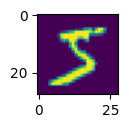

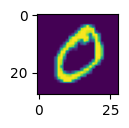

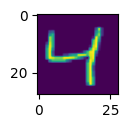

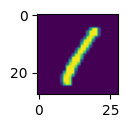

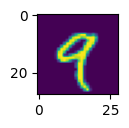

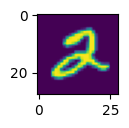

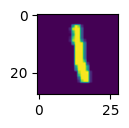

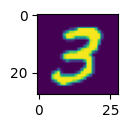

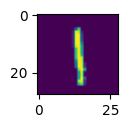

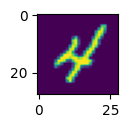

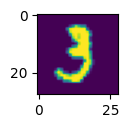

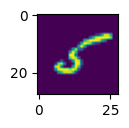

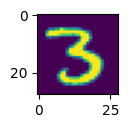

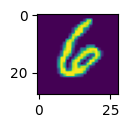

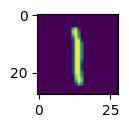

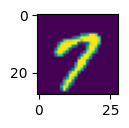

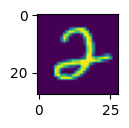

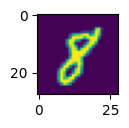

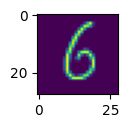

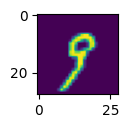

In [46]:
import matplotlib.pyplot as plt

for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(dataset['x_train'][i,:].reshape(28, 28))

    plt.show()

### 4.7.2 网络的构建

In [47]:
import numpy as np

# 使用类似shape_list = [784, 100, 10]的语句，将每个网络层中神
# 经元的数量作为数组进行输入
def make_params(shape_list):
    weight_list = []
    bias_list = []
    for i in range(len(shape_list)-1):
        # 将服从标准正态分布的随机数作为初始值
        weight = np.random.randn(shape_list[i], shape_list[i+1])
        # 将初始值全部设置为0.1
        bias = np.ones(shape_list[i+1])/10.0
        weight_list.append(weight)
        bias_list.append(bias)
    return weight_list, bias_list

In [48]:
def sigmoid(x): # Sigmoid函数
    return 1/(1+np.exp(-x))

def inner_product(X, w, b): #  在这里将内积与偏置相加
    return np.dot(X, w)+ b

def activation(X, w, b):
    return sigmoid(inner_product(X, w, b))

# 返回保存了每个网络层的计算结果的数组
def calculate(X, w_list, b_list, t):
    val_list = {}
    a_1 = inner_product(X, w_list[0], b_list[0]) # (N, 1000)
    y_1 = sigmoid(a_1) # (N, 100)
    a_2 = inner_product(y_1, w_list[1], b_list[1]) # (N, 10)
    #  这是原本想要得到的值(N,10)
    y_2 = sigmoid(a_2)
    # 在这里加入简单的归一化处理
    y_2 /= np.sum(y_2, axis=1, keepdims=True)
    S = 1/(2*len(y_2))*(y_2 - t)**2
    L = np.sum(S)
    val_list['a_1'] = a_1
    val_list['y_1'] = y_1
    val_list['a_2'] = a_2
    val_list['y_2'] = y_2
    val_list['S'] = S
    val_list['L'] = L
    return val_list

#在这里进行预测
def predict(X, w_list, b_list, t):
    val_list = calculate(X, w_list, b_list, t)
    y_2 = val_list['y_2']
    result = np.zeros_like(y_2)
    #  相当于样本数
    for i in range(y_2.shape[0]):
        result[i, np.argmax(y_2[i])] = 1
    return result

In [49]:
def accuracy(X, w_list, b_list, t):
    pre = predict(X, w_list, b_list, t)
    result = np.where(np.argmax(t, axis=1)==np.argmax(pre, axis=1), 1, 0)
    acc = np.mean(result)
    return acc
def loss_func(X, w_list, b_list, t):
    L = calculate(X, w_list, b_list, t)['L']
    return L

#eta为学习率，这里将实现参数的更新操作
def update(X, w_list, b_list, t, eta):
    val_list = {}
    val_list = calculate(X, w_list, b_list, t)
    a_1 = val_list['a_1']
    y_1 = val_list['y_1']
    a_2 = val_list['a_2']
    y_2 = val_list['y_2']
    S = val_list['S']
    L = val_list['L']
    dL_dS = 1.0
    dS_dy_2 = 1/X.shape[0]*(y_2 - t)
    dy_2_da_2 = y_2*(1.0 - y_2)
    da_2_dw_2 = np.transpose(y_1)
    da_2_db_2 = 1.0
    da_2_dy_1 = np.transpose(w_list[1])
    dy_1_da_1 = y_1 * (1 - y_1)
    da_1_dw_1 = np.transpose(X)
    da_1_db_1 = 1.0
    # 从这里开始进行参数的更新操作
    dL_da_2 =  dL_dS * dS_dy_2 * dy_2_da_2
    b_list[1] -= eta*np.sum(dL_da_2 * da_2_db_2, axis=0)
    w_list[1] -= eta*np.dot(da_2_dw_2, dL_da_2)
    dL_dy_1 = np.dot(dL_da_2, da_2_dy_1)
    dL_da_1 = dL_dy_1 * dy_1_da_1
    b_list[0] -= eta*np.sum(dL_da_1 * da_1_db_1, axis=0)
    w_list[0] -= eta*np.dot(da_1_dw_1, dL_da_1)
    return w_list, b_list

### 4.7.3　网络的训练

In [50]:
dataset = load_mnist()
X_train = dataset['x_train']
t_train = dataset['t_train']
X_test = dataset['x_test']
t_test = dataset['t_test']

weight_list, bias_list = make_params([784, 100, 10])
# 指定进行多少次学习
# train_time = 10000
train_time = 1000
# 指定每次学习使用多少个样本数据
batch_size = 1000
#创建用于记录精度和损失的变化情况的数组
total_acc_list = []
total_loss_list = []
for i in range(train_time):

    #  生成batch_size个0～59999内的随机整数
    ra = np.random.randint(60000, size=batch_size)
    # 在这里进行参数的更新操作。eta为学习率，用于决定参数按照多大比例进行更新
    # 将学习率设置为2.0
    # 在实际中往往需要反复尝试才能确定学习率
    x_batch, t_batch = X_train[ra,:], t_train[ra,:]
    weight_list, bias_list = update(x_batch, weight_list, bias_list, t_batch, eta=2.0)
    # 每学习5次对学习进度进行确认
    if (i+1)%100 == 0:
        acc_list = []
        loss_list = []
        for k in range(10000//batch_size):
            x_batch, t_batch = X_test[k*batch_size:(k+1)*batch_size, :], t_test[k*batch_size:(k+1)*batch_size, :]
            acc_val = accuracy(x_batch, weight_list, bias_list, t_batch)
            loss_val = loss_func(x_batch, weight_list, bias_list, t_batch)
            acc_list.append(acc_val)
            loss_list.append(loss_val)
        # 计算精度的平均值
        acc = np.mean(acc_list)
        # 计算损失总和
        loss = np.mean(loss_list)
        total_acc_list.append(acc)
        total_loss_list.append(loss)
        print("Time: %d, Accuracy: %f, Loss: %f"%(i+1, acc, loss))

Time: 100, Accuracy: 0.451000, Loss: 0.370033
Time: 200, Accuracy: 0.619300, Loss: 0.259999
Time: 300, Accuracy: 0.711800, Loss: 0.203734
Time: 400, Accuracy: 0.749800, Loss: 0.176723
Time: 500, Accuracy: 0.774900, Loss: 0.160400
Time: 600, Accuracy: 0.798200, Loss: 0.146933
Time: 700, Accuracy: 0.808300, Loss: 0.137605
Time: 800, Accuracy: 0.820900, Loss: 0.129633
Time: 900, Accuracy: 0.831300, Loss: 0.122786
Time: 1000, Accuracy: 0.838500, Loss: 0.117422


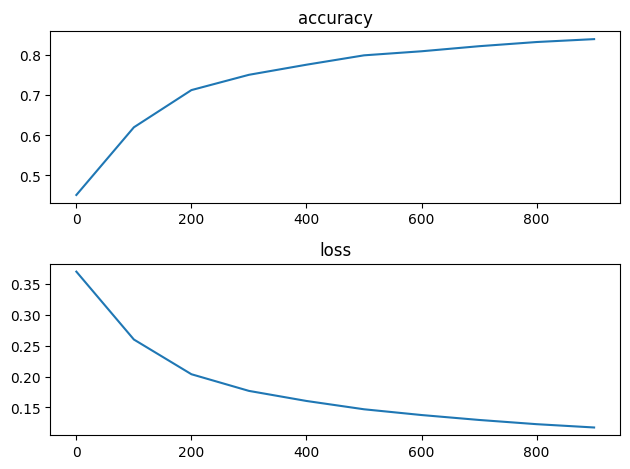

In [51]:
import matplotlib.pyplot as plt
plt.subplot(211)
plt.plot(np.arange(0, train_time, 100),total_acc_list)
plt.title('accuracy')
plt.subplot(212)
plt.plot(np.arange(0, train_time, 100), total_loss_list)
plt.title('loss')
plt.tight_layout()
plt.show()

## 4.8 NumPy神经网络编程（强化学习篇）

### 4.8.1 何谓OpenAi

### 4.8.2 游戏的安装和执行

### 4.8.3　Q学习

4.9 cartpole1

4.10 cartpole2

4.11 cartpole3

4.12 cartpole4

4.13 cartpole4

### 4.8.4 np.digitize

### 4.8.5 策略梯度算法

4.14 cartpole5